# Task 8: Traffic Sign Recognition
## Description
- Dataset (Recommended): GTSRB (Kaggle)
- Classify traffic signs based on their image using deep learning
- Preprocess images (resizing, normalization)
- Train a CNN model to recognize different traffic sign classes
- Evaluate performance using accuracy and confusion matrix
## Bonus
- Add data augmentation to improve performance
- Compare custom CNN vs. pre-trained model (e.g., MobileNet)

# Downloading the dataset

In [1]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 91%|████████████████████████████████████▍   | 558M/612M [00:00<00:00, 1.96GB/s]
100%|████████████████████████████████████████| 612M/612M [00:00<00:00, 1.95GB/s]


In [2]:
!unzip gtsrb-german-traffic-sign.zip

Archive:  gtsrb-german-traffic-sign.zip
  inflating: Meta.csv                
  inflating: Meta/.~lock.ClassesInformation.ods#  
  inflating: Meta/.~lock.ClassesInformationStrong.ods#  
  inflating: Meta/0.png              
  inflating: Meta/1.png              
  inflating: Meta/10.png             
  inflating: Meta/11.png             
  inflating: Meta/12.png             
  inflating: Meta/13.png             
  inflating: Meta/14.png             
  inflating: Meta/15.png             
  inflating: Meta/16.png             
  inflating: Meta/17.png             
  inflating: Meta/18.png             
  inflating: Meta/19.png             
  inflating: Meta/2.png              
  inflating: Meta/20.png             
  inflating: Meta/21.png             
  inflating: Meta/22.png             
  inflating: Meta/23.png             
  inflating: Meta/24.png             
  inflating: Meta/25.png             
  inflating: Meta/26.png             
  inflating: Meta/27.png             
  inflating: Met

# Performing EDA

Number of classes: 43
Example class folders: ['42', '21', '5', '28', '22']
   Class  image_count
18     2         2250
8      1         2220
25    13         2160
39    12         2100
9     38         2070


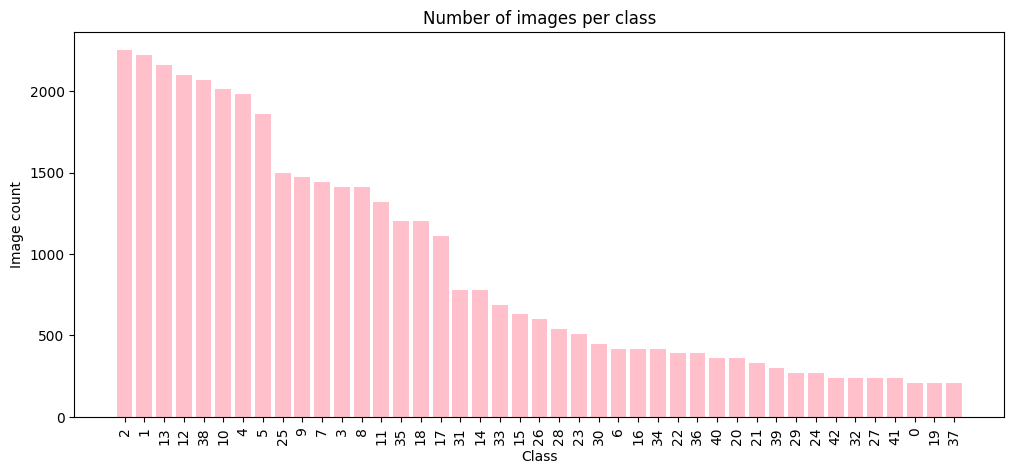

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Dataset path
train_path = "Train"

# Exploring the classes
classes = os.listdir(train_path)
print(f"Number of classes: {len(classes)}")
print(f"Example class folders: {classes[:5]}")

# Counting how many images per class
image_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) for cls in classes}
data_overview = pd.DataFrame(list(image_counts.items()), columns=["Class", "image_count"]).sort_values(by="image_count", ascending=False)
print(data_overview.head())

# Visualizing the class distribution
plt.figure(figsize=(12,5))
plt.bar(data_overview["Class"], data_overview["image_count"], color='pink')
plt.title("Number of images per class")
plt.xlabel("Class")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.show()

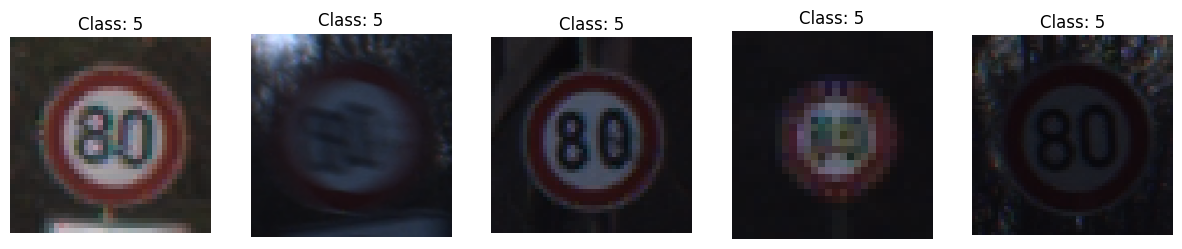

In [4]:
import random

sample_class = random.choice(classes)
sample_images = os.listdir(os.path.join(train_path, sample_class))[:5]

plt.figure(figsize=(15,4))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(train_path, sample_class, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"Class: {sample_class}")
    plt.axis("off")
plt.show()

Average width: 52.1, Average height: 51.8
Min size: [26 25], Max size: [177 171]


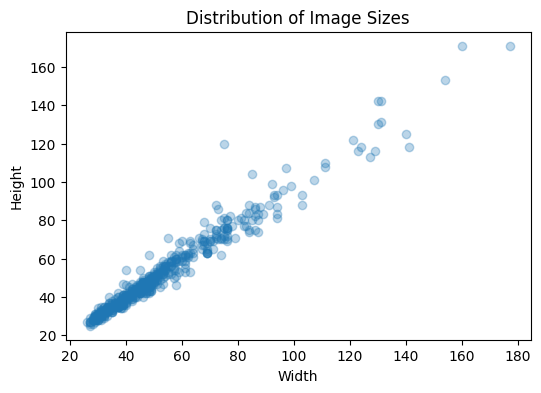

In [5]:
import numpy as np
from PIL import Image

image_shapes = []

for cls in classes[:10]:
    class_dir = os.path.join(train_path, cls)
    for img_name in os.listdir(class_dir)[:50]:
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        image_shapes.append(img.size)
        
image_shapes = np.array(image_shapes)
print(f"Average width: {image_shapes[:,0].mean():.1f}, Average height: {image_shapes[:,1].mean():.1f}")
print(f"Min size: {image_shapes.min(axis=0)}, Max size: {image_shapes.max(axis=0)}")

plt.figure(figsize=(6,4))
plt.scatter(image_shapes[:,0], image_shapes[:,1], alpha=0.3)
plt.title("Distribution of Image Sizes")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

# Preparing and cleaning the dataset

In [12]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.4/620.4 MB 1.6 MB/s eta 0:00:00m eta 0:00:010:00:09
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.6 MB/s eta 0:00:001.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 2.0 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 2.1 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 1.8 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.1 MB/s eta 0:00:002.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [15]:
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "Train"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='validation',
    shuffle=False
)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


# Building a Custom CNN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,285,099 (4.90 MB)

 Trainable params: 1,284,651 (4.90 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)

Epoch 1/10


/home/latifa-boudiaf/anaconda3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 77s 77ms/step - accuracy: 0.7870 - loss: 0.7845 - val_accuracy: 0.8708 - val_loss: 0.5377
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 74s 75ms/step - accuracy: 0.9530 - loss: 0.1615 - val_accuracy: 0.8653 - val_loss: 0.9011
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 73s 74ms/step - accuracy: 0.9740 - loss: 0.0905 - val_accuracy: 0.9133 - val_loss: 0.3834
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 77s 78ms/step - accuracy: 0.9754 - loss: 0.0935 - val_accuracy: 0.9429 - val_loss: 0.2961
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 73s 74ms/step - accuracy: 0.9819 - loss: 0.0694 - val_accuracy: 0.9112 - val_loss: 0.5727
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 71s 73ms/step - accuracy: 0.9854 - loss: 0.0587 - val_accuracy: 0.9332 - val_loss: 0.5254
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 73s 75ms/step - accuracy: 0.9850 - loss: 0.0607 - val_accuracy: 0.8620 - val_loss: 0.8575
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 71s 72ms/step - accuracy: 0.9866 - loss: 0.0547 - val_accurac

Validation Accuracy: 0.9575
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


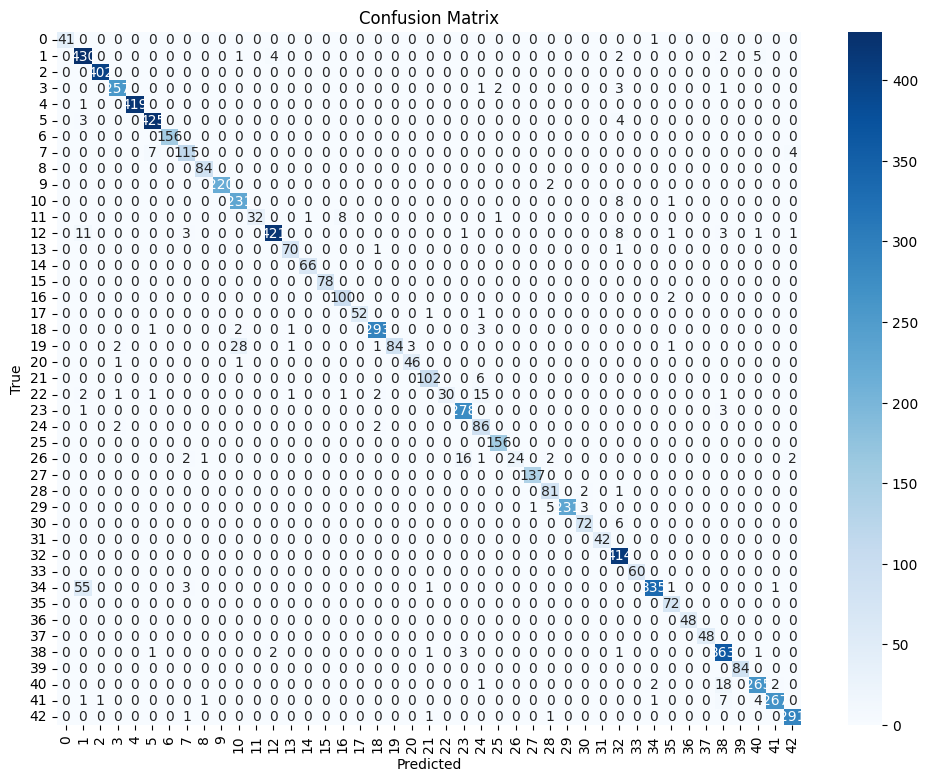

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.85      0.97      0.91       444
          10       1.00      1.00      1.00       402
          11       0.98      0.97      0.98       264
          12       1.00      1.00      1.00       420
          13       0.98      0.98      0.98       432
          14       1.00      1.00      1.00       156
          15       0.93      0.91      0.92       126
          16       0.98      1.00      0.99        84
          17       1.00      0.99      1.00       222
          18       0.88      0.96      0.92       240
          19       1.00      0.76      0.86        42
           2       0.99      0.94      0.96       450
          20       0.96      0.97      0.97        72
          21       0.99      1.00      0.99        66
          22       1.00      1.00      1.00        78
          23       0.92      0.98      0.95       102
          24       1.00    

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluating accuracy on validation data
loss, acc = model.evaluate(val_gen, verbose=0)
print(f"Validation Accuracy: {acc:.4f}")

# Predicting classes on validation data
val_gen.reset()
y_pred = model.predict(val_gen, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = val_gen.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=list(val_gen.class_indices.keys())))

# Trying data augmentation to improve robustness and reduce overfitting

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='training'
)

val_gen = val_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='validation',
    shuffle=False
)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [20]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)

Epoch 1/10


/home/latifa-boudiaf/anaconda3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.8304 - loss: 0.7609 - val_accuracy: 0.9640 - val_loss: 0.1663
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9276 - loss: 0.2638 - val_accuracy: 0.9500 - val_loss: 0.2126
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.9482 - loss: 0.1916 - val_accuracy: 0.9652 - val_loss: 0.1561
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 80ms/step - accuracy: 0.9551 - loss: 0.1584 - val_accuracy: 0.9559 - val_loss: 0.1727
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.9634 - loss: 0.1293 - val_accuracy: 0.9580 - val_loss: 0.2044
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.9668 - loss: 0.1201 - val_accuracy: 0.9478 - val_loss: 0.2967
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.9719 - loss: 0.1032 - val_accuracy: 0.9469 - val_loss: 0.2658
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.9747 - loss: 0.0925 - val_accurac

# Comparing the performance of custom CNN  and Pre-trained MobileNet 

In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

base_model = MobileNetV2(
    input_shape=(64, 64, 3),
    include_top=False,
    weights='imagenet'
)

# Freezing the base model layers
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(len(train_gen.class_indices), activation='softmax')(x)

mobilenet_model = Model(inputs=base_model.input, outputs=output)

mobilenet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mobilenet_model.summary()

/tmp/ipykernel_84180/1577124027.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 32, 32,    │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 32, 32,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 32, 32,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 32, 32,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 32, 32,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 32, 32,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 33, 33,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 16, 16,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 16, 16,    │      2,304 │ block_1_depthwis

 Total params: 2,427,499 (9.26 MB)

 Trainable params: 169,515 (662.17 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [24]:
history_mobilenet = mobilenet_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 76s 77ms/step - accuracy: 0.7002 - loss: 0.8927 - val_accuracy: 0.4448 - val_loss: 2.0787
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.7092 - loss: 0.8605 - val_accuracy: 0.4533 - val_loss: 2.1113
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 72s 74ms/step - accuracy: 0.7191 - loss: 0.8352 - val_accuracy: 0.4429 - val_loss: 2.1017
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 74s 75ms/step - accuracy: 0.7274 - loss: 0.8177 - val_accuracy: 0.4516 - val_loss: 2.1252
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 74s 75ms/step - accuracy: 0.7318 - loss: 0.7939 - val_accuracy: 0.4605 - val_loss: 2.1303
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 73s 74ms/step - accuracy: 0.7328 - loss: 0.7910 - val_accuracy: 0.4538 - val_loss: 2.2612
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 75s 76ms/step - accuracy: 0.7373 - loss: 0.7766 - val_accuracy: 0.4554 - val_loss: 2.2562
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 76s 77ms/step - accuracy: 0.7435 - loss: 0.7597 - 

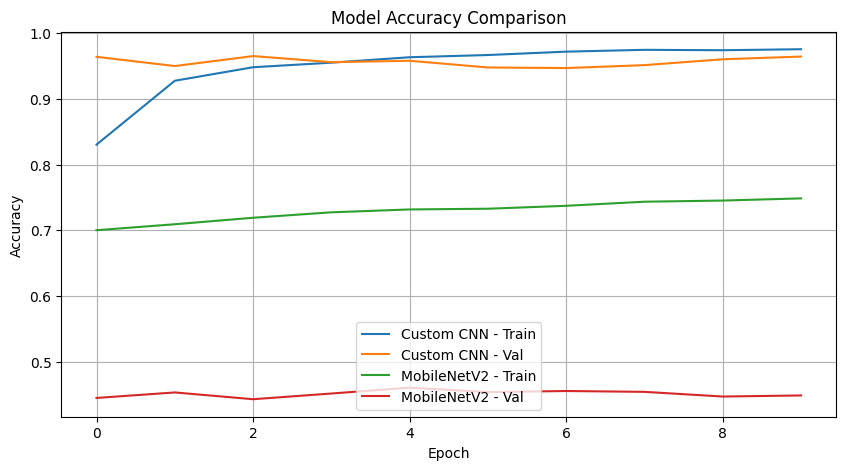

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plotting the training and validation accuracy values for both the custom CNN and the MobileNetV2
plt.plot(history.history['accuracy'], label='Custom CNN - Train')
plt.plot(history.history['val_accuracy'], label='Custom CNN - Val')

plt.plot(history_mobilenet.history['accuracy'], label='MobileNetV2 - Train')
plt.plot(history_mobilenet.history['val_accuracy'], label='MobileNetV2 - Val')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

The custom CNN achieved higher accuracy and better generalization on GTSRB compared to the pre-trained MobileNetV2. This suggests that a smaller, task-specific CNN can outperform larger pre-trained architectures when the domain gap is large.